## Cual es el ritmo de contagio del covid-19 en el mundo

**Aprenderán**.- 
funcionalidades de pandas
familiaridad con data frame y Series


**Problema**: Dados el ritmo de crecimiento de casos de COVID-19, que paises están pudiendo controlar la pandemia.

Usar pandas para analizar la pregunta y llegar a una conclusión.

 **Contexto.-** El covid comenzó en China en el 2019 y se ha propagado en todo el mundo siendo un virus letal. Por lo que actualmente el mundo se encuentra en una pandemia. Hoy en día los diferentes gobiernos de los paises está tomando diferentes medidas para controlar la expanción del virus.
 
 **Fuente de los datos.-** Usaremos los datos de la pagina del Johns Hopkins University Center for Systems Science and Engineering (JHU CCSE) from various sources including the World Health Organization (WHO). son 3 archivos .csv donde haremos análisis su análisis y veremos la tendencia que están teniendo los paises comparando igual el país de Bolivia.


### Fundamentos de Pandas
Las principales estructura de datos de pandas son:
1. Series
2. DataFrames 

Un objeto Serie almacena datos en una sola columna junto con un index.

**Otros recursos:**

Documentación de pandas: https://pandas.pydata.org/docs/reference/frame.html

Sintax para crear una serie y un DataFrame

### Serie de Pandas

In [65]:
#importar librería de pandas
import pandas as pd

In [66]:
#crear una serie
ser1 = pd.Series(index=[0,1,2,3], name="País", data=["Bolivia", "Perú", "Chile", "Argentina"])


In [67]:
ser1

0      Bolivia
1         Perú
2        Chile
3    Argentina
Name: País, dtype: object

In [68]:
ser1.index

Int64Index([0, 1, 2, 3], dtype='int64')

In [69]:
ser1.loc[3]

'Argentina'

In [70]:
"Bolivia" in ser1.values

True

### DataFrame de Pandas
Un objeto DataFrame es una estructura de datos tabular de 2 dimensiones etiquetada

### Crear un dataFrame desde un diccionario de series

In [72]:
d = {'one' : pd.Series([100., 200., 300.], index=['apple', 'ball', 'clock']),
     'two' : pd.Series([111., 222., 333., 4444.], index=['apple', 'ball', 'cerill', 'dancy'])}

In [73]:
df = pd.DataFrame(d)
print(df)

          one     two
apple   100.0   111.0
ball    200.0   222.0
cerill    NaN   333.0
clock   300.0     NaN
dancy     NaN  4444.0


In [74]:
df.index

Index(['apple', 'ball', 'cerill', 'clock', 'dancy'], dtype='object')

In [75]:
df.columns

Index(['one', 'two'], dtype='object')

In [76]:
pd.DataFrame(d, index=['dancy', 'ball', 'apple'])

,one,two
dancy,NaN,4444.0
ball,200.0,222.0
apple,100.0,111.0


In [77]:
pd.DataFrame(d, index=['dancy', 'ball', 'apple'], columns=['two', 'five'])

,two,five
dancy,4444.0,NaN
ball,222.0,NaN
apple,111.0,NaN


Cambiando del pd.Series a un pd.DataFrame, y añadiendo una lista en una columna

In [78]:
df1 = pd.DataFrame(index=[0,1,2,3], columns=["País","Población(millones)"], data=[["Bolivia",11.5],["Perú",32.17],["Chile",18.05],["Argentina",44.27]])
df1

,País,Población(millones)
0,Bolivia,11.50
1,Perú,32.17
2,Chile,18.05
3,Argentina,44.27


## Crear un dataFrame desde una lista de diccionario de python

In [79]:
data = [{'alex': 1, 'joe': 2}, {'ema': 5, 'dora': 10, 'alice': 20}]

In [80]:
pd.DataFrame(data)

,alex,joe,ema,dora,alice
0,1.0,2.0,NaN,NaN,NaN
1,NaN,NaN,5.0,10.0,20.0


In [81]:
pd.DataFrame(data, index=['orange', 'red'])

,alex,joe,ema,dora,alice
orange,1.0,2.0,NaN,NaN,NaN
red,NaN,NaN,5.0,10.0,20.0


In [82]:
pd.DataFrame(data, columns=['joe', 'dora','alice'])

,joe,dora,alice
0,2.0,NaN,NaN
1,NaN,10.0,20.0


## Operaciones básicas de data Frames

In [83]:
df

,one,two
apple,100.0,111.0
ball,200.0,222.0
cerill,NaN,333.0
clock,300.0,NaN
dancy,NaN,4444.0


In [84]:
df['one']

apple     100.0
ball      200.0
cerill      NaN
clock     300.0
dancy       NaN
Name: one, dtype: float64

In [85]:
df['three'] = df['one'] * df['two']
df

,one,two,three
apple,100.0,111.0,11100.0
ball,200.0,222.0,44400.0
cerill,NaN,333.0,NaN
clock,300.0,NaN,NaN
dancy,NaN,4444.0,NaN


In [86]:
df['flag'] = df['one'] > 250
df

,one,two,three,flag
apple,100.0,111.0,11100.0,False
ball,200.0,222.0,44400.0,False
cerill,NaN,333.0,NaN,False
clock,300.0,NaN,NaN,True
dancy,NaN,4444.0,NaN,False


In [87]:
three = df.pop('three')

In [316]:
three

apple     11100.0
ball      44400.0
cerill        NaN
clock         NaN
dancy         NaN
Name: three, dtype: float64

In [89]:
df

,one,two,flag
apple,100.0,111.0,False
ball,200.0,222.0,False
cerill,NaN,333.0,False
clock,300.0,NaN,True
dancy,NaN,4444.0,False


In [90]:
del df['two']

In [91]:
df

,one,flag
apple,100.0,False
ball,200.0,False
cerill,NaN,False
clock,300.0,True
dancy,NaN,False


In [92]:
df.insert(1, 'copy_of_one', df['one'])
df

,one,copy_of_one,flag
apple,100.0,100.0,False
ball,200.0,200.0,False
cerill,NaN,NaN,False
clock,300.0,300.0,True
dancy,NaN,NaN,False


In [93]:
df['one_upper_half'] = df['one'][:2]
df

,one,copy_of_one,flag,one_upper_half
apple,100.0,100.0,False,100.0
ball,200.0,200.0,False,200.0
cerill,NaN,NaN,False,NaN
clock,300.0,300.0,True,NaN
dancy,NaN,NaN,False,NaN


Datos disponibles para hacer analysis sobre la pandemia:
1. Paises/Región
2. Fecha en que se registró un infectado

cargar los datos de un archivo .csv usando el método [pd.read_csv()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

In [ ]:
#cargar paqueter
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Required to display image inline
from IPython.display import Image

# This line is needed to display plots inline in Jupyter Notebook
%matplotlib inline
os.getcwd()

In [95]:
os.listdir(os.getcwd())

In [96]:
#Deben estar corriendo el notebook en el mismo directorio de donde está el archivo que van a importar
covid19_confirmed = pd.read_csv('time_series_covid19_confirmed_global.csv')
#covid19_deaths = pd.read_csv('time_series_covid19_deaths_global.csv')
#covid19_recovered = pd.read_csv('time_series_covid19_recovered_global.csv')

Los metodos más comunes para ver un poco el dataset:
1. DataFrame.head() -> devuelve el nombre de las columnas y las primeras 5 filas
2. DataFrame.tail() -> devuelve el nombre de las columnas y las últimas 5 filas
3. DataFrame.shape() -> dvuelve(numero de filas, numero de columnas)
4. DataFrame.columns -> devuelve los indices de las columnas
5. DataFrame.Index -> devuelve indices de las filas

In [99]:
covid19_confirmed.head(2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,74,84,94,110,110,120,170,174,237,273
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,123,146,174,186,197,212,223,243,259,277


In [6]:
covid19_confirmed.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20
253,NaN,Botswana,-22.328500,24.684900,0,0,0,0,0,0,...,0,0,0,0,0,0,3,4,4,4
254,NaN,Burundi,-3.373100,29.918900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,3
255,NaN,Sierra Leone,8.460555,-11.779889,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2,2
256,"Bonaire, Sint Eustatius and Saba",Netherlands,12.178400,-68.238500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
257,NaN,Malawi,-13.254308,34.301525,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


Vemos que hay 257 filas (cada fila siendo un punto de datos). para saber e shape usamos el atributo shape

In [100]:
covid19_confirmed.shape

(258, 76)

En pandas se lo puede llamar a una columna por su indice o por su nombre.

DataFrame.columns y DataFrame.index devuelve un objeto indice

In [101]:
covid19_confirmed.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20'],
      dtype='object')

In [102]:
list(covid19_confirmed.columns)[20:25]

['2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20']

In [103]:
covid19_confirmed.index

RangeIndex(start=0, stop=258, step=1)

### Descriptive Statistics

1. min()
2. median()
3. mean()
4. max()
5. quantile()

In [104]:
covid19_confirmed["4/2/20"].min()

0

In [105]:
covid19_confirmed["4/2/20"].median()

183.0

In [106]:
covid19_confirmed["4/2/20"].mean()

3926.9651162790697

In [107]:
covid19_confirmed["4/2/20"].max()

243453

EL método más eficiente para computar rapidamente todo el resumen estadistico, es el método [describe()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)

In [108]:
covid19_confirmed["4/2/20"].describe()

count       258.000000
mean       3926.965116
std       19916.495927
min           0.000000
25%          21.250000
50%         183.000000
75%         897.000000
max      243453.000000
Name: 4/2/20, dtype: float64

Borraré las columnas de latitud y longitud por el momento

In [109]:
df2 = covid19_confirmed.drop(['Lat','Long'], axis=1)

In [110]:
#df2.head()
df2.shape

(258, 74)

### Group by
agrupa las filas del dataframe que tienen valores en común [groupby()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)

In [114]:
df2[df2["Country/Region"]=="Australia"]

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20
8,Australian Capital Territory,Australia,0,0,0,0,0,0,0,0,...,39,39,53,62,71,77,78,80,84,87
9,New South Wales,Australia,0,0,0,0,3,4,4,4,...,818,1029,1219,1405,1617,1791,2032,2032,2182,2298
10,Northern Territory,Australia,0,0,0,0,0,0,0,0,...,6,6,12,12,15,15,15,17,19,21
11,Queensland,Australia,0,0,0,0,0,0,0,1,...,397,443,493,555,625,656,689,743,781,835
12,South Australia,Australia,0,0,0,0,0,0,0,0,...,170,170,235,257,287,299,305,337,367,367
13,Tasmania,Australia,0,0,0,0,0,0,0,0,...,28,36,47,47,62,66,66,69,69,72
14,Victoria,Australia,0,0,0,0,1,1,1,1,...,411,466,520,574,685,769,821,917,968,1036
15,Western Australia,Australia,0,0,0,0,0,0,0,0,...,175,175,231,231,278,311,355,364,392,400


In [115]:
df3 = df2.groupby("Country/Region").sum()

In [117]:
#df3.head(15)
df3

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,74,84,94,110,110,120,170,174,237,273
Albania,0,0,0,0,0,0,0,0,0,0,...,123,146,174,186,197,212,223,243,259,277
Algeria,0,0,0,0,0,0,0,0,0,0,...,264,302,367,409,454,511,584,716,847,986
Andorra,0,0,0,0,0,0,0,0,0,0,...,164,188,224,267,308,334,370,376,390,428
Angola,0,0,0,0,0,0,0,0,0,0,...,3,3,4,4,5,7,7,7,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,0,0,0,0,0,0,0,0,0,0,...,84,91,107,107,119,119,135,135,143,146
Vietnam,0,2,2,2,2,2,2,2,2,2,...,134,141,153,163,174,188,203,212,218,233
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,59,59,84,91,98,109,116,119,134,161


In [120]:
df3.sort_values(by="4/2/20", ascending=False, inplace=True)

In [121]:
df3.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
US,1,1,2,2,5,5,5,5,5,7,...,53740,65778,83836,101657,121478,140886,161807,188172,213372,243453
Italy,0,0,0,0,0,0,0,0,0,2,...,69176,74386,80589,86498,92472,97689,101739,105792,110574,115242
Spain,0,0,0,0,0,0,0,0,0,0,...,39885,49515,57786,65719,73235,80110,87956,95923,104118,112065
Germany,0,0,0,0,0,1,4,4,4,5,...,32986,37323,43938,50871,57695,62095,66885,71808,77872,84794
China,548,643,920,1406,2075,2877,5509,6087,8141,9802,...,81591,81661,81782,81897,81999,82122,82198,82279,82361,82432


In [122]:
most_infected = df3.head()

In [123]:
most_infected
#covid19_confirmed[covid19_confirmed["Country/Region"]=="Bolivia"].melt().tail(20)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
US,1,1,2,2,5,5,5,5,5,7,...,53740,65778,83836,101657,121478,140886,161807,188172,213372,243453
Italy,0,0,0,0,0,0,0,0,0,2,...,69176,74386,80589,86498,92472,97689,101739,105792,110574,115242
Spain,0,0,0,0,0,0,0,0,0,0,...,39885,49515,57786,65719,73235,80110,87956,95923,104118,112065
Germany,0,0,0,0,0,1,4,4,4,5,...,32986,37323,43938,50871,57695,62095,66885,71808,77872,84794
China,548,643,920,1406,2075,2877,5509,6087,8141,9802,...,81591,81661,81782,81897,81999,82122,82198,82279,82361,82432


In [23]:
#most_infected = most_infected.set_index('Country/Region')

In [124]:
most_infected.T

Country/Region,US,Italy,Spain,Germany,China
1/22/20,1,0,0,0,548
1/23/20,1,0,0,0,643
1/24/20,2,0,0,0,920
1/25/20,2,0,0,0,1406
1/26/20,5,0,0,0,2075
...,...,...,...,...,...
3/29/20,140886,97689,80110,62095,82122
3/30/20,161807,101739,87956,66885,82198
3/31/20,188172,105792,95923,71808,82279
4/1/20,213372,110574,104118,77872,82361


In [125]:
most_infected_T = most_infected.T
most_infected_T

Country/Region,US,Italy,Spain,Germany,China
1/22/20,1,0,0,0,548
1/23/20,1,0,0,0,643
1/24/20,2,0,0,0,920
1/25/20,2,0,0,0,1406
1/26/20,5,0,0,0,2075
...,...,...,...,...,...
3/29/20,140886,97689,80110,62095,82122
3/30/20,161807,101739,87956,66885,82198
3/31/20,188172,105792,95923,71808,82279
4/1/20,213372,110574,104118,77872,82361


### Visualización

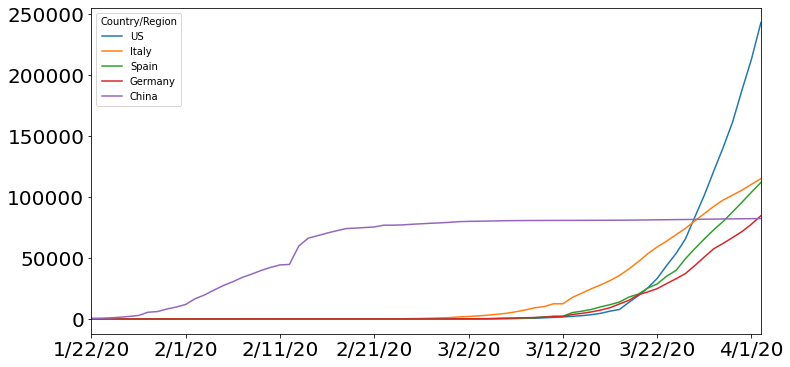

In [126]:
lines = most_infected_T.plot.line(figsize=(12,6), fontsize=20)

In [127]:
most_infected_T.head()

Country/Region,US,Italy,Spain,Germany,China
1/22/20,1,0,0,0,548
1/23/20,1,0,0,0,643
1/24/20,2,0,0,0,920
1/25/20,2,0,0,0,1406
1/26/20,5,0,0,0,2075


In [129]:
most_infected_T = most_infected_T.reset_index()

In [130]:
most_infected_T

Country/Region,level_0,index,US,Italy,Spain,Germany,China
0,0,1/22/20,1,0,0,0,548
1,1,1/23/20,1,0,0,0,643
2,2,1/24/20,2,0,0,0,920
3,3,1/25/20,2,0,0,0,1406
4,4,1/26/20,5,0,0,0,2075
...,...,...,...,...,...,...,...
67,67,3/29/20,140886,97689,80110,62095,82122
68,68,3/30/20,161807,101739,87956,66885,82198
69,69,3/31/20,188172,105792,95923,71808,82279
70,70,4/1/20,213372,110574,104118,77872,82361


In [131]:
most_infected_T = most_infected_T.rename(columns={"index":"Fecha"})

In [132]:
most_infected_T

Country/Region,level_0,Fecha,US,Italy,Spain,Germany,China
0,0,1/22/20,1,0,0,0,548
1,1,1/23/20,1,0,0,0,643
2,2,1/24/20,2,0,0,0,920
3,3,1/25/20,2,0,0,0,1406
4,4,1/26/20,5,0,0,0,2075
...,...,...,...,...,...,...,...
67,67,3/29/20,140886,97689,80110,62095,82122
68,68,3/30/20,161807,101739,87956,66885,82198
69,69,3/31/20,188172,105792,95923,71808,82279
70,70,4/1/20,213372,110574,104118,77872,82361


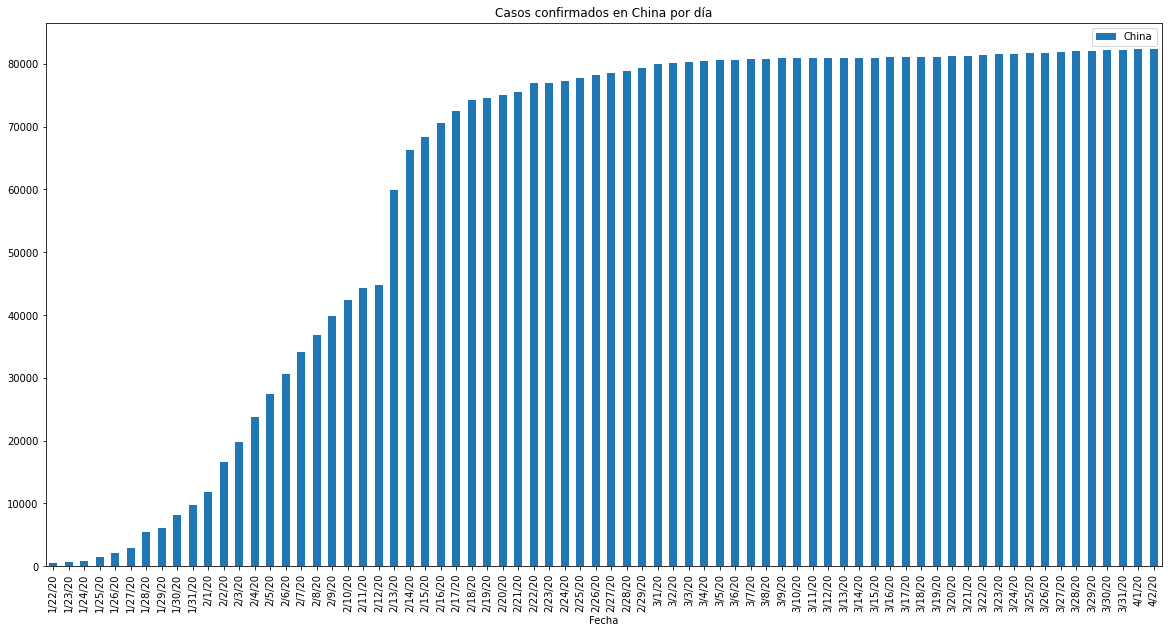

In [140]:
most_infected_T.plot.bar(x="Fecha" , y="China", figsize=(20,10), title="Casos confirmados en China por día")

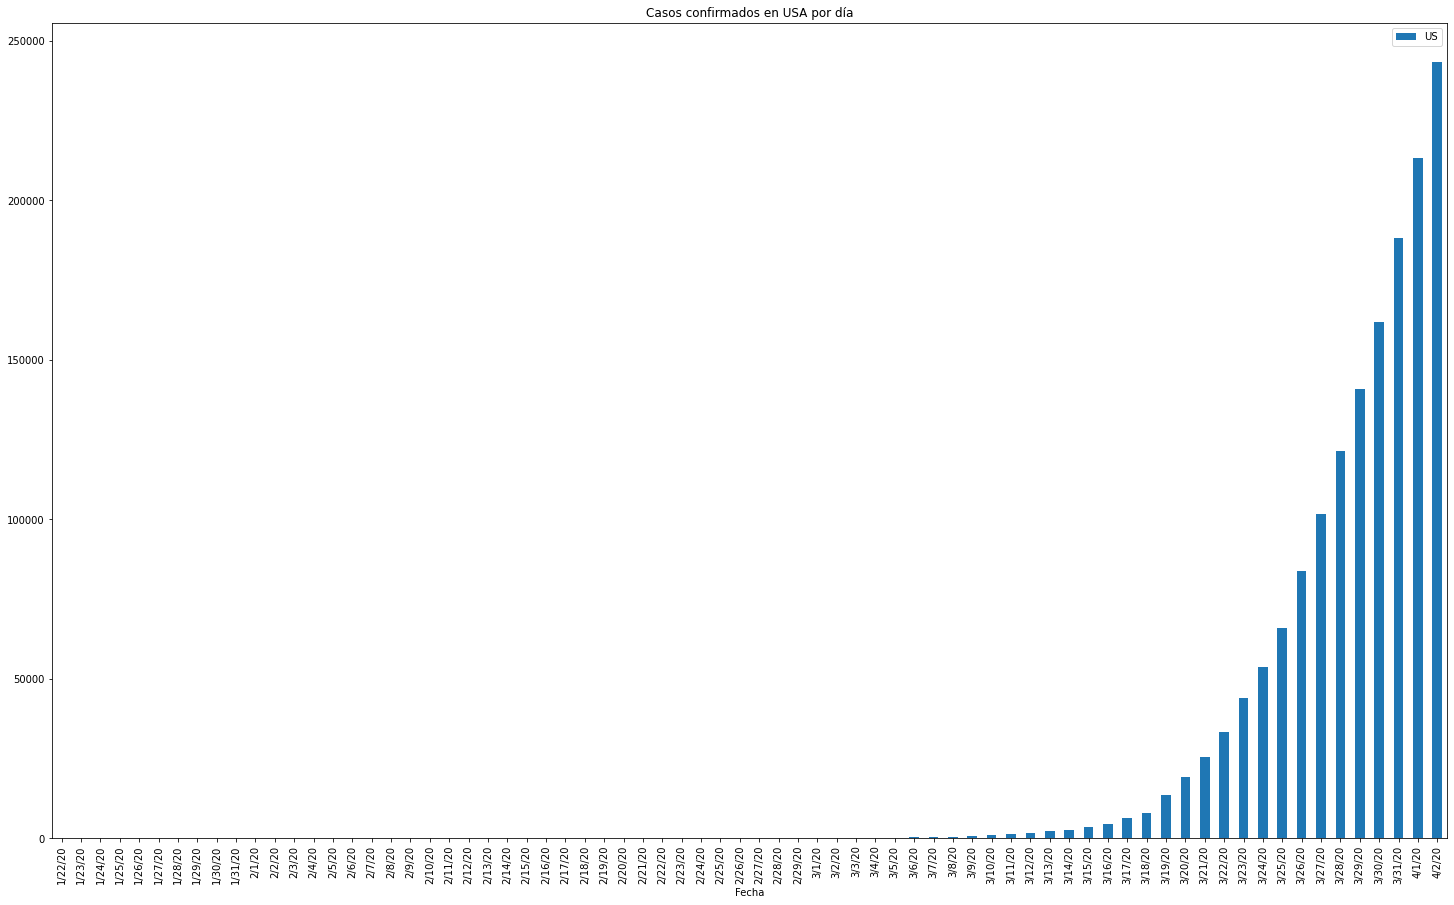

In [141]:
most_infected_T.plot.bar(x="Fecha" , y="US", figsize=(25,15), title="Casos confirmados en USA por día")

In [26]:
#filter = covid19_deaths['Country/Region'].str.contains("US")
#covid19_deaths[filter]

In [191]:
#tomando el data frame que usamos anteriormente
Bol_df = df3[df3.index=="Bolivia"]

In [192]:
Bol_df = Bol_df.T

In [193]:
Bol_df = Bol_df.reset_index()

In [194]:
Bol_df = Bol_df.rename(columns={"index":"Fecha"})

In [195]:
Bol_df

Country/Region,Fecha,Bolivia
0,1/22/20,0
1,1/23/20,0
2,1/24/20,0
3,1/25/20,0
4,1/26/20,0
...,...,...
67,3/29/20,81
68,3/30/20,97
69,3/31/20,107
70,4/1/20,115


Voy a graficar desde la fecha que se registró el primer caso confirmado en Bolivia

In [196]:
Bol_df = Bol_df[Bol_df["Bolivia"]>0]
Bol_df.head()

Country/Region,Fecha,Bolivia
49,3/11/20,2
50,3/12/20,2
51,3/13/20,3
52,3/14/20,10
53,3/15/20,10


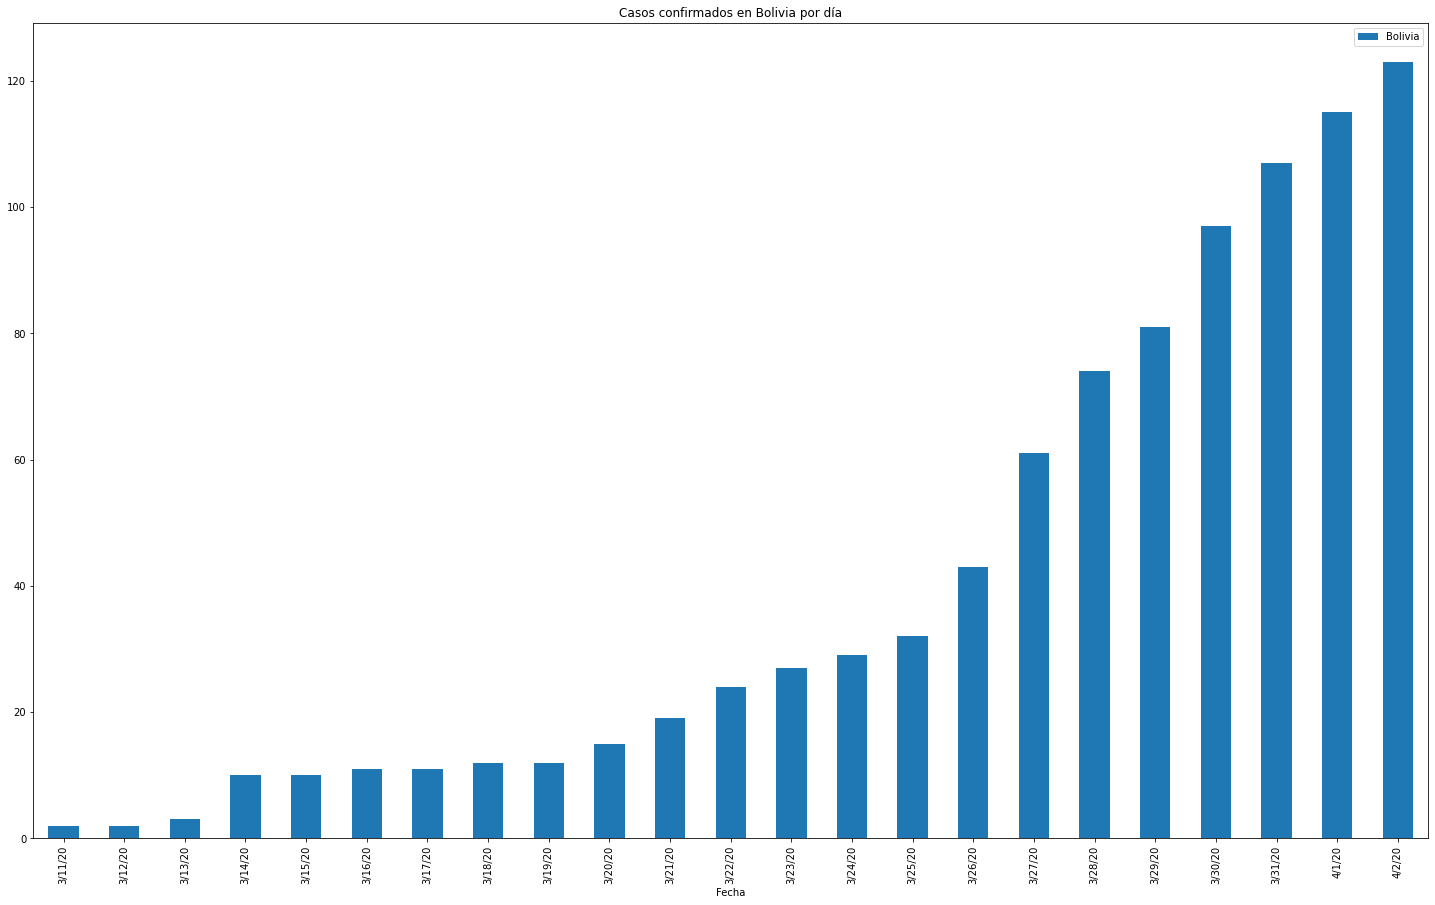

In [197]:
Bol_df.plot.bar(x="Fecha" , y="Bolivia", figsize=(25,15), title="Casos confirmados en Bolivia por día")